# The Battle of Neighbourhoods of Ahmedabad

In [10]:
# reading csv file from local machine as insert to code

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3e693f6b817e477c8c3c1ef25cbf7142 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='I-_Kk53bEJfE6Xg-f6MZBV7ggnCOy9J3ZaHEWAZp3gNi',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3e693f6b817e477c8c3c1ef25cbf7142.get_object(Bucket='notebook-donotdelete-pr-m20jjrzs58vrjk',Key='ahmedabad-city-pincodes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Area,Pincode
0,Ambli Ahmedabad,380058
1,Amraiwadi Ahmedabad,380026
2,Asarwa Chakla Ahmedabad,380016
3,Aslali Ahmedabad,382427
4,Anandnagar Ahmedabad,380007


Now we have the dataframe of area and pincode.

In [11]:
pip install geopy


The following command must be run outside of the IPython shell:

    $ pip install geopy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [12]:
# using geopy for geocoding

from geopy.geocoders import Nominatim
nom=Nominatim(user_agent="my-application")
n=nom.geocode("Ambli Ahmedabad")
n

Location(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahmedabad District, Gujarat, 380001, India, (23.018494, 72.495454, 0.0))

In [13]:
df_data_1["Coordinates"]=df_data_1["Area"].apply(nom.geocode)
df_data_1

,Area,Pincode,Coordinates
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme..."
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ..."
2,Asarwa Chakla Ahmedabad,380016,None
3,Aslali Ahmedabad,382427,"(Aslali, Daskroi Taluka, Ahmedabad District, G..."
4,Anandnagar Ahmedabad,380007,None
5,Asarwa Ext South Ahmedabad,380024,None
6,Bakrol Ahmedabad,382210,None
7,Azad Society Ahmedabad,380015,None
8,Bakrol Ahmedabad,382430,None
9,Ashram Road P O Ahmedabad,380009,None


In [14]:
df_data_1["Latitude"]=df_data_1["Coordinates"].apply(lambda x: x.latitude if x != None else None)
df_data_1["Longitude"]=df_data_1["Coordinates"].apply(lambda x: x.longitude if x != None else None)
df_data_1

,Area,Pincode,Coordinates,Latitude,Longitude
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme...",23.018494,72.495454
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ...",23.005757,72.626982
2,Asarwa Chakla Ahmedabad,380016,None,NaN,NaN
3,Aslali Ahmedabad,382427,"(Aslali, Daskroi Taluka, Ahmedabad District, G...",22.916358,72.592176
4,Anandnagar Ahmedabad,380007,None,NaN,NaN
5,Asarwa Ext South Ahmedabad,380024,None,NaN,NaN
6,Bakrol Ahmedabad,382210,None,NaN,NaN
7,Azad Society Ahmedabad,380015,None,NaN,NaN
8,Bakrol Ahmedabad,382430,None,NaN,NaN
9,Ashram Road P O Ahmedabad,380009,None,NaN,NaN


In [15]:
# removing NaN values

df_data_1 = df_data_1.dropna()
df_data_1

,Area,Pincode,Coordinates,Latitude,Longitude
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme...",23.018494,72.495454
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ...",23.005757,72.626982
3,Aslali Ahmedabad,382427,"(Aslali, Daskroi Taluka, Ahmedabad District, G...",22.916358,72.592176
10,Bapunagar Ahmedabad,380024,"(Sagar Orthopaedic Hospital, Bapunagar, Lal Ba...",23.036241,72.630339
11,Bhat Ahmedabad,382210,"(Gandhinagar-Ahmedabad Highway, Bhat, Gandhina...",23.134482,72.633002
14,Bhairavnath Road Ahmedabad,380028,"(Bhairavnath, BRTS Station, Uttamnagar, Rambag...",22.995457,72.599065
16,Behrampura Ahmedabad,380022,"(Behrampura, Ahmedabad, Ahmadabad City Taluka,...",23.003589,72.583840
18,Cantonment Ahmedabad,380004,"(Ahmedabad, Ahmadabad City Taluka, Ahmedabad D...",23.021624,72.579707
19,Bodakdev Ahmedabad,380054,"(Bodakdev, Ahmedabad, Ahmadabad City Taluka, A...",23.044227,72.517458
21,Bopal Ahmedabad,380058,"(Bopal, Daskroi Taluka, Ahmedabad District, Gu...",23.029699,72.465579


In [16]:
df_data_2 = df_data_1.reset_index(drop=True)

In [17]:
df_data_2

,Area,Pincode,Coordinates,Latitude,Longitude
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme...",23.018494,72.495454
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ...",23.005757,72.626982
2,Aslali Ahmedabad,382427,"(Aslali, Daskroi Taluka, Ahmedabad District, G...",22.916358,72.592176
3,Bapunagar Ahmedabad,380024,"(Sagar Orthopaedic Hospital, Bapunagar, Lal Ba...",23.036241,72.630339
4,Bhat Ahmedabad,382210,"(Gandhinagar-Ahmedabad Highway, Bhat, Gandhina...",23.134482,72.633002
5,Bhairavnath Road Ahmedabad,380028,"(Bhairavnath, BRTS Station, Uttamnagar, Rambag...",22.995457,72.599065
6,Behrampura Ahmedabad,380022,"(Behrampura, Ahmedabad, Ahmadabad City Taluka,...",23.003589,72.583840
7,Cantonment Ahmedabad,380004,"(Ahmedabad, Ahmadabad City Taluka, Ahmedabad D...",23.021624,72.579707
8,Bodakdev Ahmedabad,380054,"(Bodakdev, Ahmedabad, Ahmadabad City Taluka, A...",23.044227,72.517458
9,Bopal Ahmedabad,380058,"(Bopal, Daskroi Taluka, Ahmedabad District, Gu...",23.029699,72.465579


Now we have the coordinates, latitute and longitude.

In [18]:
!pip -q install folium

In [19]:
# using folium for mapping

import folium

address = 'Ambli Ahmedabad'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ambli Ahmedabad are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ambli Ahmedabad are 23.018494, 72.495454.


In [20]:
map_ahmedabad = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area, pincode in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Area'], df_data_2['Pincode']):
    label = '{}, {}'.format(area, pincode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ahmedabad)  
    
map_ahmedabad

Now we use Foursqaure API to get info on areas.

In [21]:
CLIENT_ID = 'JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP' # your Foursquare ID
CLIENT_SECRET = 'VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP
CLIENT_SECRET:VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ


In [22]:
df_data_2.loc[0, 'Area']

'Ambli Ahmedabad'

In [23]:
area_latitude = df_data_2.loc[0, 'Latitude'] # neighborhood latitude value
area_longitude = df_data_2.loc[0, 'Longitude'] # neighborhood longitude value

area_name = df_data_2.loc[0, 'Area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(area_name, 
                                                               area_latitude, 
                                                               area_longitude))

Latitude and longitude values of Ambli Ahmedabad are 23.018494, 72.495454.


In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    area_latitude, 
    area_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JBREGZ4UNA53HX43WMAD4TQ2X2XJWMX5DPHEZEIZHQA0ACNP&client_secret=VNS40KF3V4MGSWWAV0IGQINZIGIT1EQKNCWBFPOS3QF1JMOJ&v=20180605&ll=23.018494,72.495454&radius=500&limit=100'

In [25]:
import json
import requests

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1050751a4b0a001b89f347'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Ahmedabad',
  'headerFullLocation': 'Ahmedabad',
  'headerLocationGranularity': 'city',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 23.022994004500006,
    'lng': 72.50033416785988},
   'sw': {'lat': 23.013993995499995, 'lng': 72.49057383214011}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '583bf9a36cea3f62661ba7ec',
       'name': 'Atl Express',
       'location': {'address': '710 Infinity Towers, corporate road, Prahlad Nagar',
        'lat': 23.014336320293804,
        'lng': 72.49531388282776,
        'labeledLatLng

Now we get category of areas.

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Atl Express,Business Service,23.014336,72.495314


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


Now we get nearby venues of areas.

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
ahmedabad_venues = getNearbyVenues(names=df_data_2['Area'],
                                   latitudes=df_data_2['Latitude'],
                                   longitudes=df_data_2['Longitude']
                                  )

Ambli Ahmedabad
Amraiwadi Ahmedabad
Aslali Ahmedabad
Bapunagar Ahmedabad
Bhat Ahmedabad
Bhairavnath Road Ahmedabad
Behrampura Ahmedabad
Cantonment Ahmedabad
Bodakdev Ahmedabad
Bopal Ahmedabad
Chandkheda Ahmedabad
D Cabin Ahmedabad
Civil Hospital Ahmedabad
Dariapur   Ahmedabad
Delhi Gate  Ahmedabad
District Court  Ahmedabad
Ellisbridge Ahmedabad
Geratpur Ahmedabad
Gandhi Road   Ahmedabad
Gandhi Ashram   Ahmedabad
Girdharnagar Ahmedabad
Gheekanta Road Ahmedabad
Ghuma Ahmedabad
Gita Mandir Road Ahmedabad
Gujarat University Ahmedabad
Gomtipur Ahmedabad
I I M Ahmedabad
Isanpur Ahmedabad
Jetalpur Ahmedabad
Jamalpur   Ahmedabad
Jivraj Park Ahmedabad
Jawahar Chowk Ahmedabad
Juhapura Ahmedabad
Kasindra Ahmedabad
Kathwada Ahmedabad
Khadia Ahmedabad
Khanpur   Ahmedabad
Kuha Ahmedabad
Kubernagar B A Ahmedabad
Kubernagar Ahmedabad
Lambha Ahmedabad
Lal Darwaja Ahmedabad
Madhupura Market Ahmedabad
Manek Chowk Ahmedabad
Maninagar Ahmedabad
Medra Ahmedabad
Memnagar Ahmedabad
Nandej Ahmedabad
Motera Ahm

In [32]:
print(ahmedabad_venues.shape)
ahmedabad_venues.head()

(248, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ambli Ahmedabad,23.018494,72.495454,Atl Express,23.014336,72.495314,Business Service
1,Amraiwadi Ahmedabad,23.005757,72.626982,mayur restaurant,23.003412,72.624535,Indian Restaurant
2,Bapunagar Ahmedabad,23.036241,72.630339,u s pizza,23.038358,72.630313,Pizza Place
3,Bapunagar Ahmedabad,23.036241,72.630339,Woodland Original,23.032949,72.630868,Clothing Store
4,Bapunagar Ahmedabad,23.036241,72.630339,Sankalp,23.039934,72.630960,Indian Restaurant


In [33]:
ahmedabad_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Ambli Ahmedabad,1,1,1,1,1,1
Amraiwadi Ahmedabad,1,1,1,1,1,1
Bapunagar Ahmedabad,4,4,4,4,4,4
Behrampura Ahmedabad,1,1,1,1,1,1
Bhairavnath Road Ahmedabad,6,6,6,6,6,6
Bhat Ahmedabad,3,3,3,3,3,3
Bodakdev Ahmedabad,8,8,8,8,8,8
Bopal Ahmedabad,1,1,1,1,1,1
Cantonment Ahmedabad,4,4,4,4,4,4


In [34]:
print('There are {} uniques categories.'.format(len(ahmedabad_venues['Venue Category'].unique())))

There are 67 uniques categories.


In [35]:
# one hot encoding
ahmedabad_onehot = pd.get_dummies(ahmedabad_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ahmedabad_onehot['Area'] = ahmedabad_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [ahmedabad_onehot.columns[-1]] + list(ahmedabad_onehot.columns[:-1])
ahmedabad_onehot = ahmedabad_onehot[fixed_columns]

ahmedabad_onehot.head()

,Area,ATM,Art Gallery,Asian Restaurant,Bakery,Boat or Ferry,Bookstore,Breakfast Spot,Bus Station,Business Service,...,Snack Place,Sports Club,Tea Room,Theme Park,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Zoo
0,Ambli Ahmedabad,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Amraiwadi Ahmedabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bapunagar Ahmedabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bapunagar Ahmedabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bapunagar Ahmedabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
ahmedabad_onehot.shape

(248, 68)

In [37]:
ahmedabad_grouped = ahmedabad_onehot.groupby('Area').mean().reset_index()
ahmedabad_grouped

,Area,ATM,Art Gallery,Asian Restaurant,Bakery,Boat or Ferry,Bookstore,Breakfast Spot,Bus Station,Business Service,...,Snack Place,Sports Club,Tea Room,Theme Park,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Zoo
0,Ambli Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,Amraiwadi Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,Bapunagar Ahmedabad,0.0,0.000000,0.00,0.250000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,Behrampura Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,Bhairavnath Road Ahmedabad,0.0,0.000000,0.00,0.166667,0.0,0.000000,0.166667,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
5,Bhat Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
6,Bodakdev Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.125000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
7,Bopal Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
8,Cantonment Ahmedabad,0.0,0.250000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
9,Chandkheda Ahmedabad,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


Now we explore the areas using seaborn boxplots.

In [90]:
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text xticklabel objects>)

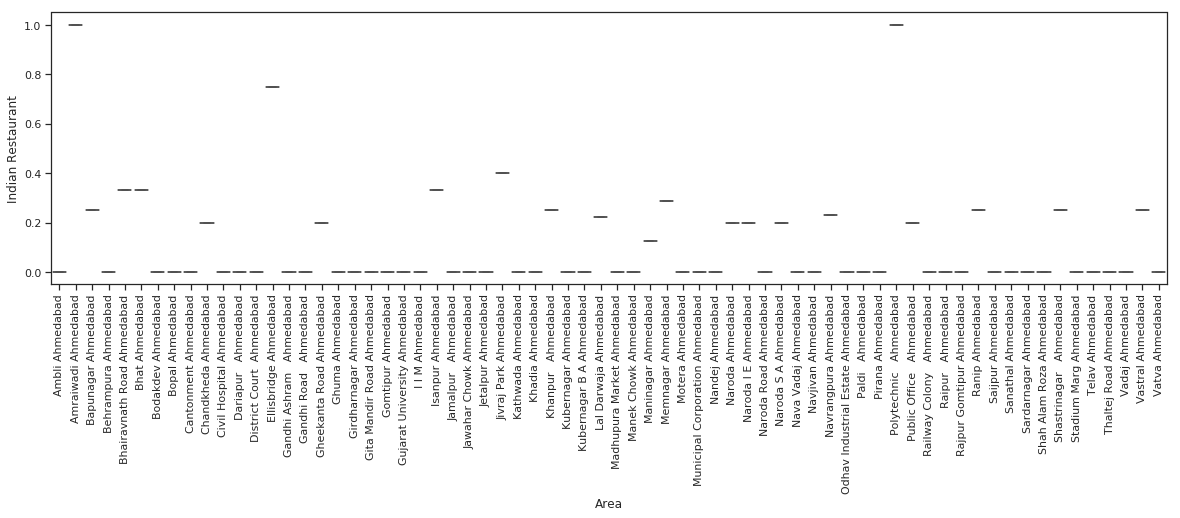

In [92]:
import seaborn as sns

plt.figure(figsize=(20,5))
sns.boxplot(
    data=ahmedabad_grouped,
    x="Area",
    y="Indian Restaurant",
    color='r')
plt.xticks(rotation=90)

In [93]:
ahmedabad_grouped.shape

(68, 68)

In [94]:
num_top_venues = 5

for area in ahmedabad_grouped['Area']:
    print("----"+area+"----")
    temp = ahmedabad_grouped[ahmedabad_grouped['Area'] == area].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ambli Ahmedabad----
               venue  freq
0   Business Service   1.0
1  Mobile Phone Shop   0.0
2        Pizza Place   0.0
3           Pharmacy   0.0
4               Park   0.0


----Amraiwadi Ahmedabad----
               venue  freq
0  Indian Restaurant   1.0
1              Motel   0.0
2           Platform   0.0
3        Pizza Place   0.0
4           Pharmacy   0.0


----Bapunagar Ahmedabad----
               venue  freq
0  Indian Restaurant  0.25
1        Pizza Place  0.25
2             Bakery  0.25
3     Clothing Store  0.25
4              Motel  0.00


----Behrampura Ahmedabad----
                  venue  freq
0   Rental Car Location   1.0
1     Recreation Center   0.0
2             Juice Bar   0.0
3  Kitchen Supply Store   0.0
4                  Lake   0.0


----Bhairavnath Road Ahmedabad----
                  venue  freq
0     Indian Restaurant  0.33
1  Fast Food Restaurant  0.17
2                Bakery  0.17
3           Pizza Place  0.17
4        Breakfast Spot  0.17




                  venue  freq
0     Indian Restaurant   0.2
1  Fast Food Restaurant   0.2
2        Breakfast Spot   0.2
3             Multiplex   0.2
4                 Diner   0.2


----Naroda Road Ahmedabad----
               venue  freq
0           Tea Room  0.33
1             Bakery  0.33
2      Historic Site  0.33
3  Mobile Phone Shop  0.00
4        Pizza Place  0.00


----Naroda S A Ahmedabad----
                  venue  freq
0     Indian Restaurant   0.2
1  Fast Food Restaurant   0.2
2        Breakfast Spot   0.2
3             Multiplex   0.2
4                 Diner   0.2


----Nava Vadaj Ahmedabad----
               venue  freq
0        Bus Station   1.0
1                ATM   0.0
2  Mobile Phone Shop   0.0
3        Pizza Place   0.0
4           Pharmacy   0.0


----Navjivan Ahmedabad----
               venue  freq
0   Video Game Store   0.5
1          Multiplex   0.5
2                ATM   0.0
3  Mobile Phone Shop   0.0
4        Pizza Place   0.0


----Navrangpura Ahmedabad----

Now we get common venues.

In [95]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [96]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
areas_venues_sorted = pd.DataFrame(columns=columns)
areas_venues_sorted['Area'] = ahmedabad_grouped['Area']

for ind in np.arange(ahmedabad_grouped.shape[0]):
    areas_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ahmedabad_grouped.iloc[ind, :], num_top_venues)

areas_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambli Ahmedabad,Business Service,Zoo,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Football Stadium,Deli / Bodega
1,Amraiwadi Ahmedabad,Indian Restaurant,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Furniture / Home Store
2,Bapunagar Ahmedabad,Indian Restaurant,Bakery,Clothing Store,Pizza Place,Zoo,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant
3,Behrampura Ahmedabad,Rental Car Location,Zoo,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium,Deli / Bodega
4,Bhairavnath Road Ahmedabad,Indian Restaurant,Bakery,Breakfast Spot,Fast Food Restaurant,Pizza Place,Zoo,Food Court,Diner,Electronics Store,Farmers Market


Now we use machine learning for identifying clusters.

In [97]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# set number of clusters
kclusters = 5

ahmedabad_grouped_clustering = ahmedabad_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ahmedabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 4, 1, 4, 4, 1, 1, 1, 4], dtype=int32)

In [98]:
# add clustering labels
areas_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

ahmedabad_merged = df_data_2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ahmedabad_merged = ahmedabad_merged.join(areas_venues_sorted.set_index('Area'), on='Area')


# check the last columns!
ahmedabad_merged.head()

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme...",23.018494,72.495454,3.0,Business Service,Zoo,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Football Stadium,Deli / Bodega
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ...",23.005757,72.626982,4.0,Indian Restaurant,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Furniture / Home Store
2,Aslali Ahmedabad,382427,"(Aslali, Daskroi Taluka, Ahmedabad District, G...",22.916358,72.592176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bapunagar Ahmedabad,380024,"(Sagar Orthopaedic Hospital, Bapunagar, Lal Ba...",23.036241,72.630339,4.0,Indian Restaurant,Bakery,Clothing Store,Pizza Place,Zoo,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant
4,Bhat Ahmedabad,382210,"(Gandhinagar-Ahmedabad Highway, Bhat, Gandhina...",23.134482,72.633002,4.0,Indian Restaurant,Italian Restaurant,Diner,Zoo,Food Court,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Furniture / Home Store


In [99]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ahmedabad_merged['Latitude'], ahmedabad_merged['Longitude'], ahmedabad_merged['Area'], ahmedabad_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [100]:
ahmedabad_merged.loc[ahmedabad_merged['Cluster Label'] == 0, ahmedabad_merged.columns]

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Nava Vadaj Ahmedabad,380013,"(Nava-Vadaj, Ahmedabad, Ahmadabad City Taluka,...",23.068224,72.564099,0.0,Bus Station,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Zoo,Deli / Bodega
83,Vadaj Ahmedabad,380013,"(Nava-Vadaj, Ahmedabad, Ahmadabad City Taluka,...",23.068224,72.564099,0.0,Bus Station,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Zoo,Deli / Bodega


In [101]:
ahmedabad_merged.loc[ahmedabad_merged['Cluster Label'] == 1, ahmedabad_merged.columns]

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Behrampura Ahmedabad,380022,"(Behrampura, Ahmedabad, Ahmadabad City Taluka,...",23.003589,72.583840,1.0,Rental Car Location,Zoo,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium,Deli / Bodega
7,Cantonment Ahmedabad,380004,"(Ahmedabad, Ahmadabad City Taluka, Ahmedabad D...",23.021624,72.579707,1.0,Park,Art Gallery,River,Castle,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Zoo
8,Bodakdev Ahmedabad,380054,"(Bodakdev, Ahmedabad, Ahmadabad City Taluka, A...",23.044227,72.517458,1.0,Coffee Shop,Ice Cream Shop,Café,Hotel,Tea Room,Furniture / Home Store,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market
9,Bopal Ahmedabad,380058,"(Bopal, Daskroi Taluka, Ahmedabad District, Gu...",23.029699,72.465579,1.0,Park,Zoo,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium,Hotel
12,Civil Hospital Ahmedabad,380016,"(Civil Hospital, Jethabhai Parmar Garden Path,...",23.051438,72.605116,1.0,Concert Hall,Café,Zoo,Food Court,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium,Dessert Shop
13,Dariapur Ahmedabad,380001,"(Dariapur Daraza, Kasturba Gandhi Road, Dariya...",23.037431,72.592963,1.0,Pizza Place,Dessert Shop,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Zoo,Hotel
15,District Court Ahmedabad,380001,"(Ahmedabad, Ahmadabad City Taluka, Ahmedabad D...",23.021624,72.579707,1.0,Park,Art Gallery,River,Castle,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Zoo
19,Gandhi Ashram Ahmedabad,380027,"(Ahmedabad, Ahmadabad City Taluka, Ahmedabad D...",23.021624,72.579707,1.0,Park,Art Gallery,River,Castle,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Zoo
20,Girdharnagar Ahmedabad,380004,"(Girdharnagar, Ahmedabad, Ahmadabad City Taluk...",23.050214,72.597892,1.0,Sandwich Place,History Museum,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium,Deli / Bodega
22,Ghuma Ahmedabad,380058,"(Ghuma, Daskroi Taluka, Ahmedabad District, Gu...",23.029511,72.450601,1.0,Lake,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Furniture / Home Store


In [102]:
ahmedabad_merged.loc[ahmedabad_merged['Cluster Label'] == 2, ahmedabad_merged.columns]

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Jetalpur Ahmedabad,382427,"(Primary Health Centre, Jetalpur, NH48;64, Das...",22.892300,72.596618,2.0,Boat or Ferry,Food Court,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Furniture / Home Store
29,Jamalpur Ahmedabad,380001,"(Jamalpur, Ahmedabad, Ahmadabad City Taluka, A...",23.013924,72.582062,2.0,Boat or Ferry,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Furniture / Home Store


In [103]:
ahmedabad_merged.loc[ahmedabad_merged['Cluster Label'] == 3, ahmedabad_merged.columns]

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ambli Ahmedabad,380058,"(Ambli, Ahmedabad, Ahmadabad City Taluka, Ahme...",23.018494,72.495454,3.0,Business Service,Zoo,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Football Stadium,Deli / Bodega
34,Kathwada Ahmedabad,382430,"(Kathwada GIDC, Nava Naroda, Ahmedabad, Ahmada...",23.032917,72.683062,3.0,Business Service,Zoo,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Football Stadium,Deli / Bodega
86,Vatva Ahmedabad,382445,"(Vatva, Vatva phase -2 road, Vatva Gidc, Ramol...",22.958998,72.629798,3.0,ATM,Business Service,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Football Stadium,Deli / Bodega


In [104]:
ahmedabad_merged.loc[ahmedabad_merged['Cluster Label'] == 4, ahmedabad_merged.columns]

,Area,Pincode,Coordinates,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Amraiwadi Ahmedabad,380026,"(Amraiwadi, Ahmedabad, Ahmadabad City Taluka, ...",23.005757,72.626982,4.0,Indian Restaurant,Zoo,Football Stadium,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court,Furniture / Home Store
3,Bapunagar Ahmedabad,380024,"(Sagar Orthopaedic Hospital, Bapunagar, Lal Ba...",23.036241,72.630339,4.0,Indian Restaurant,Bakery,Clothing Store,Pizza Place,Zoo,Flea Market,Diner,Electronics Store,Farmers Market,Fast Food Restaurant
4,Bhat Ahmedabad,382210,"(Gandhinagar-Ahmedabad Highway, Bhat, Gandhina...",23.134482,72.633002,4.0,Indian Restaurant,Italian Restaurant,Diner,Zoo,Food Court,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Furniture / Home Store
5,Bhairavnath Road Ahmedabad,380028,"(Bhairavnath, BRTS Station, Uttamnagar, Rambag...",22.995457,72.599065,4.0,Indian Restaurant,Bakery,Breakfast Spot,Fast Food Restaurant,Pizza Place,Zoo,Food Court,Diner,Electronics Store,Farmers Market
10,Chandkheda Ahmedabad,382424,"(Chandkheda, Chenpur, Ahmadabad City Taluka, A...",23.110064,72.581120,4.0,Ice Cream Shop,Farmers Market,Pizza Place,Indian Restaurant,Health Food Store,Gym,Gujarati Restaurant,Garden,Furniture / Home Store,History Museum
16,Ellisbridge Ahmedabad,380006,"(Ellisbridge, Gita Mandir, Dhalgarvad -khadia,...",23.022614,72.573297,4.0,Indian Restaurant,Restaurant,Zoo,Food Court,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Football Stadium
18,Gandhi Road Ahmedabad,380001,"(Gandhi Road, Gita Mandir, Manek Chowk, Ahmeda...",23.024314,72.588103,4.0,Historic Site,Snack Place,Fast Food Restaurant,Pharmacy,Gujarati Restaurant,Garden,Furniture / Home Store,Football Stadium,Deli / Bodega,Gym
21,Gheekanta Road Ahmedabad,380001,"(Gheekanta Road, Gita Mandir, Dariyapur, Ahmed...",23.032545,72.597692,4.0,Indian Restaurant,Farmers Market,Coffee Shop,Clothing Store,Motel,Zoo,Flea Market,Electronics Store,Fast Food Restaurant,Food Court
23,Gita Mandir Road Ahmedabad,380022,"(Gita Mandir, Khadia, Ahmedabad, Ahmadabad Cit...",23.015200,72.593222,4.0,Multiplex,Shopping Mall,Fast Food Restaurant,Tea Room,Zoo,Diner,Electronics Store,Farmers Market,Flea Market,Food Court
27,Isanpur Ahmedabad,382443,"(Isanpur, Ahmedabad, Ahmadabad City Taluka, Ah...",22.981130,72.601295,4.0,Indian Restaurant,Dessert Shop,Business Service,Zoo,Football Stadium,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food Court
